## hindcast example

This is a hindcast workflow using D3D. It uses new data every 12h.

In [ ]:
#to use the full width of the browser window
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import pyPoseidon
from pyPoseidon.utils import cast, data, point
import pickle
import pandas as pd
import datetime

In [2]:
pyPoseidon.__version__

'0.3.0'

### setup

In [3]:
#read the info from the first run
with open('/Users/brey/Downloads/EUR/D3D/ERAI/201701/gebco_eur_01_info.pkl', 'r') as f:
              info=pickle.load(f)

In [4]:
#define some info
info.update({'path':'/Users/brey/Downloads/EUR/D3D/ERAI/', # The path of the project
     'case':'European 2010', # a reference tag
     })

In [5]:
start_date = info['start_date']
end_date = pd.to_datetime('2017-5-1 0:0:0')

s = pd.Series(index=pd.date_range(start_date, end_date))
df = s.resample('MS').size().to_period('m').rename_axis('Month').reset_index(name='NumDays')
df

,Month,NumDays
0,2017-01,31
1,2017-02,28
2,2017-03,31
3,2017-04,30
4,2017-05,1


In [6]:
#creating a time sequence of the runs
date_list = pd.date_range(start_date,end_date, freq='1M') - pd.offsets.MonthBegin(1, normalize=True)
date_list

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01'], dtype='datetime64[ns]', freq='MS')

In [7]:
dates = [pd.to_datetime(x) for x in date_list]
dates

[Timestamp('2017-01-01 00:00:00', freq='MS'),
 Timestamp('2017-02-01 00:00:00', freq='MS'),
 Timestamp('2017-03-01 00:00:00', freq='MS'),
 Timestamp('2017-04-01 00:00:00', freq='MS')]

In [8]:
#creating a sequence of folder to store the runs. In this case we name them after the date attribute.
#NOTE that the first folder is the fisrt run already perfomed!!
folders = [x.strftime('%Y%m') for x in date_list]
folders

['201701', '201702', '201703', '201704']

In [9]:
time_frames = [pd.to_timedelta('{}D'.format(x)) for x in df.NumDays.values[:-1]]
time_frames

[Timedelta('31 days 00:00:00'),
 Timedelta('28 days 00:00:00'),
 Timedelta('31 days 00:00:00'),
 Timedelta('30 days 00:00:00')]

In [10]:
#append to dic
info.update({'start_date':start_date,'end_date':end_date, 'dates' : dates, 'time_frames':time_frames, 'folders':folders})

In [11]:
#creating a sequence of folder from which we read the meteo.
meteo = []
PATH='/Users/brey/DATA/ERAI/'
for date in date_list:
    year = int(pd.to_datetime(date).strftime('%Y'))
    dur = [PATH+'eraInterim_{:04d}.grib'.format(year)]
    meteo.append(dur)


In [12]:
meteo

[['/Users/brey/DATA/ERAI/eraInterim_2017.grib'],
 ['/Users/brey/DATA/ERAI/eraInterim_2017.grib'],
 ['/Users/brey/DATA/ERAI/eraInterim_2017.grib'],
 ['/Users/brey/DATA/ERAI/eraInterim_2017.grib']]

In [13]:
info.update({'meteo_files':meteo})

In [14]:
#check
info['folders'],info['meteo_files']

(['201701', '201702', '201703', '201704'],
 [['/Users/brey/DATA/ERAI/eraInterim_2017.grib'],
  ['/Users/brey/DATA/ERAI/eraInterim_2017.grib'],
  ['/Users/brey/DATA/ERAI/eraInterim_2017.grib'],
  ['/Users/brey/DATA/ERAI/eraInterim_2017.grib']])

### run the hindcast

In [27]:
#set cast
h = cast.cast(**info) # initialize

In [28]:
info['dates']

[Timestamp('2017-01-01 00:00:00', freq='MS'),
 Timestamp('2017-02-01 00:00:00', freq='MS'),
 Timestamp('2017-03-01 00:00:00', freq='MS'),
 Timestamp('2017-04-01 00:00:00', freq='MS')]

In [ ]:
h.run()

## Analysis of data

In [ ]:
%matplotlib inline

In [15]:
folders = [info['path']+f for f in info['folders']]
folders

['/Users/brey/Downloads/EUR/D3D/ERAI/201701',
 '/Users/brey/Downloads/EUR/D3D/ERAI/201702',
 '/Users/brey/Downloads/EUR/D3D/ERAI/201703',
 '/Users/brey/Downloads/EUR/D3D/ERAI/201704']

In [16]:
otp = data(folders=folders,solver='d3d')#,sa_date='2010-2-1',se_date='2010-2-2 12:0:0') # optionally set range for tide gauge data acquisition 


reading data based on /Users/brey/Downloads/EUR/D3D/ERAI/201701/gebco_eur_01_info.pkl 

reading precompiled data ...


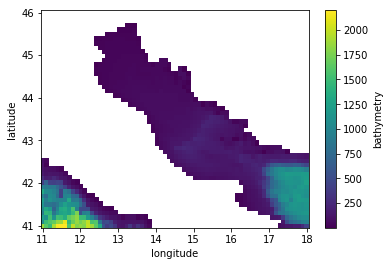

In [28]:
otp.impl.dem.bathymetry.plot()

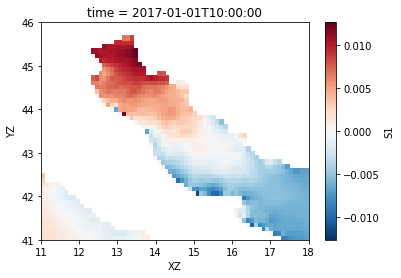

In [29]:
otp.impl.Dataset.S1[10,:,:].plot()

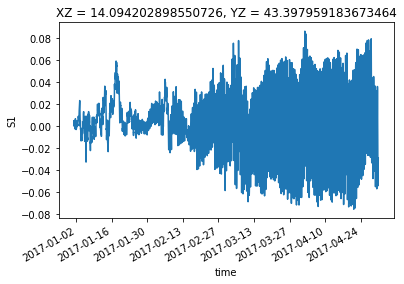

In [30]:
otp.impl.Dataset.S1[:,23,30].plot.line()

In [17]:
otp.impl.obs.locations

,ID,Name,Group,Latency,Details,Last Date,Max. Time,Min. Time,lat,lon,Status
0,1837,Italy - Ancona (ISPRA),ISPRA,17m,Details,09 Apr 2018 11:24,09 Apr 2018 11:03,28 Jun 2012 05:36,43.625,13.507,Active
1,1843,Italy - Civitavecchia (ISPRA),ISPRA,17m,Details,09 Apr 2018 11:24,09 Apr 2018 11:03,28 Jun 2012 05:36,42.094,11.790,Active
2,1866,Italy - San Benedetto del Tronto (ISPRA),ISPRA,22m,Details,09 Apr 2018 11:19,09 Apr 2018 11:06,01 Jan 2012 00:02,42.955,13.890,Active
3,1869,Italy - Trieste (ISPRA),ISPRA,53m,Details,09 Apr 2018 10:48,09 Apr 2018 10:48,28 Jun 2012 06:04,45.649,13.758,Active
4,1870,Italy - Venezia (ISPRA),ISPRA,20m,Details,09 Apr 2018 11:21,09 Apr 2018 11:04,01 Jan 2015 10:40,45.418,12.427,Active
5,2570,Italy - Venezia (ISPRA) TEST,ISPRA,20m,Details,09 Apr 2018 11:21,09 Apr 2018 11:21,01 Jan 2015 10:40,45.418,12.427,Active
6,1483,Italy - Venice,TD UNESCO,48m,Details,09 Apr 2018 10:53,09 Apr 2018 10:53,29 Apr 2011 19:08,45.418,12.427,Active
7,100041,ISPRA-04,TADSERVER,14m,Details,09 Apr 2018 11:57,09 Apr 2018 10:15,31 Mar 2014 16:25,45.649,13.758,Active


In [ ]:
# Get with index number
p = otp.impl.obs.iloc(6)
print p.head()
print p.tail()

In [ ]:
plat,plon = otp.impl.obs.locations.loc[2,['lat','lon']]

In [ ]:
ts = point(lon=plon,lat=plat,data=otp.impl)
ts.tseries(var='S1')

In [ ]:
## Join the graphs
ax = p.plot(figsize=(14,10))
ts.S1.plot(ax=ax,color=['r'],label='d3d')
ax.legend(loc='center left',bbox_to_anchor=(1.1, 0.5))